data

https://www.kaggle.com/datasets/vipullrathod/fish-market
  

In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.neighbors import KNeighborsClassifier

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

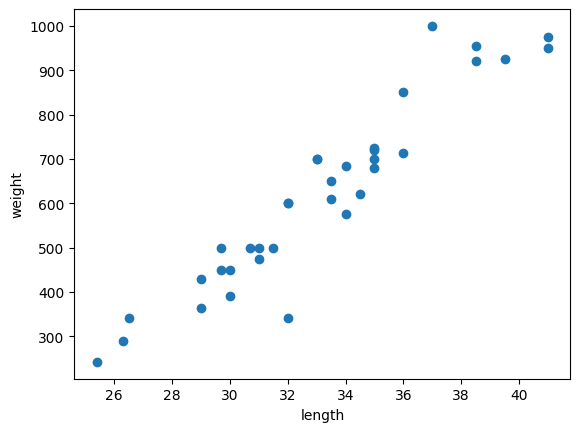

In [6]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()    

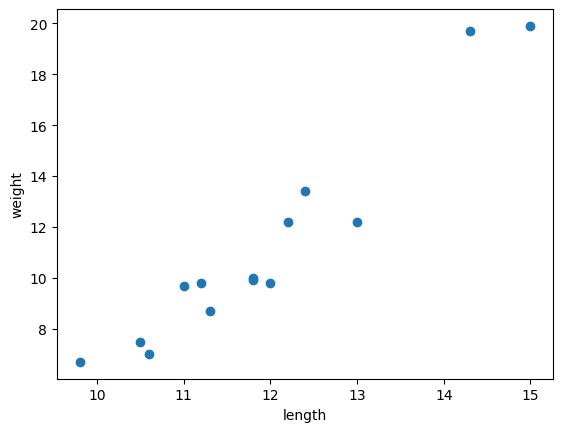

In [7]:
import matplotlib.pyplot as plt

plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()    

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
len(bream_length)
len(smelt_length)

14

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

fish_data = []

for l,w in zip(length, weight):
    fish_data.append([l,w])

fish_target = [1] * 35 + [0] * 14

In [10]:
kn.fit(fish_data, fish_target)

r = kn.predict([[30, 600]])
print(r)

[1]


In [11]:
if kn.predict([[30,600]])[0] ==1:
    print('도미')
else:
    print('빙어')

도미


In [12]:
#모델 저장하기 

import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

In [13]:
# 모델 불러오기
with open("model.pkl", "rb" ) as f:
    fish_model = pickle.load(f)

In [14]:
fish_model.predict([[30.1,600.1]])

array([1])

In [15]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [16]:
kn.predict([[25, 150]])
d, i = kn.kneighbors([[25, 150]])

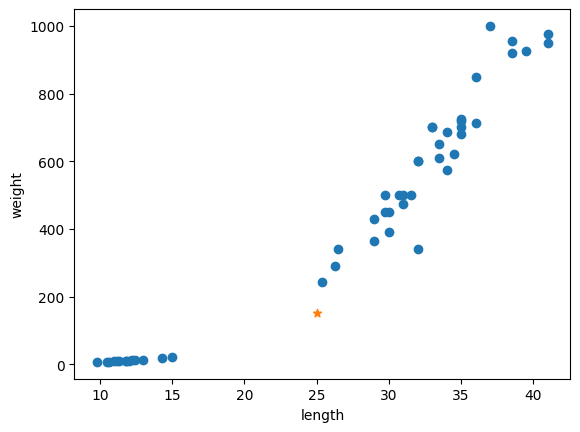

In [17]:
import matplotlib.pyplot as plt

plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(25, 150, marker="*")
plt.show()  

In [18]:
#표준점수(standard score)
#표준점수=(데이터 - 평균) / 표준편차
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)
train_scaled = (fish_data - mean) / std

In [19]:
#학습
kn.fit(train_scaled, fish_target)
domi = [25, 150]
domi_scaled = (domi - mean) / std
kn.predict([domi_scaled])

array([1.])

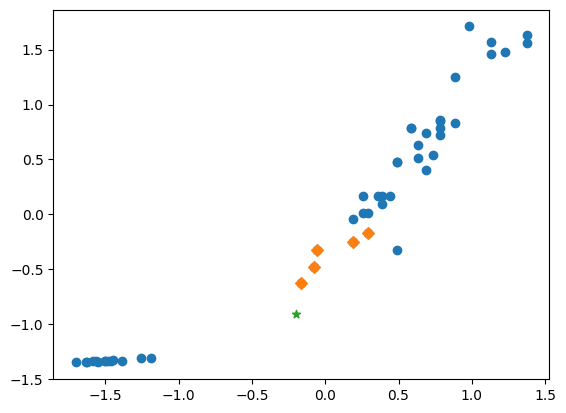

In [22]:
#산점도 다시 그려 보기(이웃 포함)
distances, indexes = kn.kneighbors([domi_scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.scatter(domi_scaled[0], domi_scaled[1], marker='*')
plt.show()

In [ ]:
#실습
# kn = KNeighborsClassifier(n_neighbors=5) 의 K(이웃) 값을
# 5,,15,25,49, 로 변경해서 훈련, 예측, 산점도 그려보기